In [16]:
import pandas as pd
import re
import nltk
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
data = pd.read_csv('srinivas_amazon_reviews.csv')

In [18]:
nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bojja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bojja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
def preprocess_text(text):
    if isinstance(text, float):
        text = str(text)
    text = text.lower()
    text = re.sub(r'[\[\]\(\)\.,;:?!\"\'—–“”‘’]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word.lower() not in stop_words]
    return " ".join(tokens)
data['data'] = data['Review'].apply(preprocess_text)

In [20]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data['target'] = data['data'].apply(get_sentiment)

In [21]:
data

,Review,data,target
0,I loved the style of this jacket and the revie...,love style jacket review good watchlist went s...,negative
1,I've had this jacket about a year now and I re...,ive jacket year realli feel compel leav review...,positive
2,This is the worst clothing purchase I've ever ...,worst cloth purchas ive ever made third time w...,negative
3,NaN,nan,neutral
4,This may be great for a someone who wants to p...,may great someon want pretend rug look functio...,positive
...,...,...,...
695,The fit and quality is great! My only gripe is...,fit qualiti great gripe pocket liner stitch pr...,positive
696,My husband first received one of these jackets...,husband first receiv one jacket gift wore love...,positive
697,My husband absolutely loves this jacket. We li...,husband absolut love jacket live florida much ...,positive
698,I can't say anything bad. I live in Iowa and r...,cant say anyth bad live iowa recent use jacket...,positive


In [22]:
data['target'] = data['target'].apply(lambda x: 1 if x == "positive" else 0)

In [23]:
data

,Review,data,target
0,I loved the style of this jacket and the revie...,love style jacket review good watchlist went s...,0
1,I've had this jacket about a year now and I re...,ive jacket year realli feel compel leav review...,1
2,This is the worst clothing purchase I've ever ...,worst cloth purchas ive ever made third time w...,0
3,NaN,nan,0
4,This may be great for a someone who wants to p...,may great someon want pretend rug look functio...,1
...,...,...,...
695,The fit and quality is great! My only gripe is...,fit qualiti great gripe pocket liner stitch pr...,1
696,My husband first received one of these jackets...,husband first receiv one jacket gift wore love...,1
697,My husband absolutely loves this jacket. We li...,husband absolut love jacket live florida much ...,1
698,I can't say anything bad. I live in Iowa and r...,cant say anyth bad live iowa recent use jacket...,1


In [24]:
data['target'].value_counts()

target
1    553
0    147
Name: count, dtype: int64

In [25]:
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  # Remove stopwords and stem words
    text = ' '.join(text)
    return text

In [26]:
data['text'] = data['data'].apply(preprocess_text)

In [27]:
X = data['text']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [29]:
joblib.dump(vectorizer, 'tfidf_vectorizer_ourdata.pkl')

['tfidf_vectorizer_ourdata.pkl']

In [30]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)
joblib.dump(nb_model, 'naive_bayes_model1.pkl')

['naive_bayes_model1.pkl']

In [31]:
svm_model = SVC()
svm_model.fit(X_train_vect, y_train)
joblib.dump(svm_model, 'svm_model1.pkl')

['svm_model1.pkl']

In [32]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vect, y_train)
joblib.dump(lr_model, 'logistic_regression_model1.pkl')

['logistic_regression_model1.pkl']

In [33]:
y_pred_nb = nb_model.predict(X_test_vect)
y_pred_svm = svm_model.predict(X_test_vect)
y_pred_lr = lr_model.predict(X_test_vect)

In [34]:
print("Naive Bayes Model")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

print("SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Naive Bayes Model
Accuracy: 0.7857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17        33
           1       0.78      1.00      0.88       107

    accuracy                           0.79       140
   macro avg       0.89      0.55      0.52       140
weighted avg       0.83      0.79      0.71       140

SVM Model
Accuracy: 0.8357142857142857
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.30      0.47        33
           1       0.82      1.00      0.90       107

    accuracy                           0.84       140
   macro avg       0.91      0.65      0.68       140
weighted avg       0.86      0.84      0.80       140

Logistic Regression Model
Accuracy: 0.8285714285714286
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.27      0.43        33
           1       0.82 

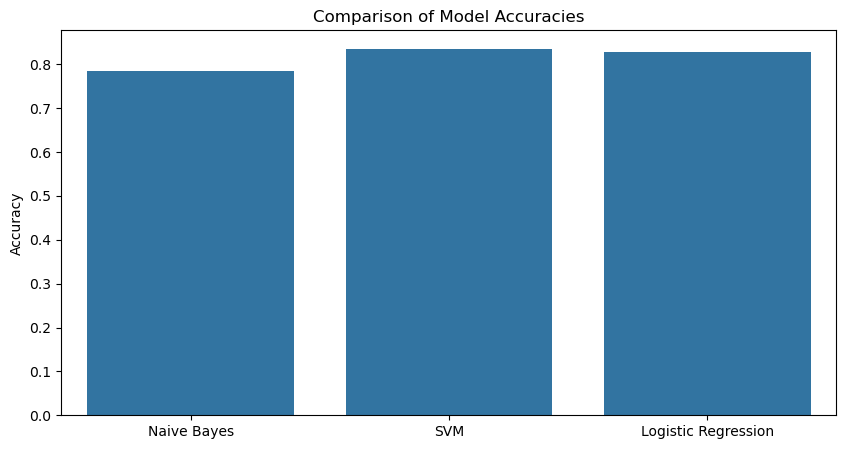

In [35]:
models = ['Naive Bayes', 'SVM', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_lr)]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()